In [147]:
import wfdb

In [148]:
import warnings
warnings.filterwarnings('ignore')

In [149]:
fp = "Data/tpehgt_n001"

In [150]:
x = wfdb.rdrecord(fp)
x.__dict__

{'record_name': 'tpehgt_n001',
 'n_sig': 8,
 'fs': 20,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 35300,
 'base_time': None,
 'base_date': None,
 'comments': ['Comments:',
  'RecID\ttpehgt_n001',
  'RecType Non-pregnant',
  'Gestation N/A',
  'Rectime N/A',
  'Age None',
  'Parity None',
  'Abortions None',
  'Weight None',
  'Placental_position N/A',
  'Smoker None'],
 'sig_name': ['EHG1',
  'EHG1_Butter-4-bi-0.08-5',
  'EHG2',
  'EHG2_Butter-4-bi-0.08-5',
  'EHG3',
  'EHG3_Butter-4-bi-0.08-5',
  'TOCO',
  'TOCO_Butter-4-bi-0.08-5'],
 'p_signal': array([[ 0.02830549,  0.02143893,  0.06851301, ..., -0.10002289,
         -0.33524071, -0.10131991],
        [ 0.00953689,  0.01747158,  0.06134127, ..., -0.21568627,
         -0.34409094, -0.21034562],
        [ 0.00144961,  0.00709545,  0.0593576 , ..., -0.20149538,
         -0.35194934, -0.21164263],
        ...,
        [-0.04707408,  0.01495384, -0.12062257, ...,  0.0015259 ,
          0.00480659, -0.00061036],
        [-0

In [151]:
x.p_signal

array([[ 0.02830549,  0.02143893,  0.06851301, ..., -0.10002289,
        -0.33524071, -0.10131991],
       [ 0.00953689,  0.01747158,  0.06134127, ..., -0.21568627,
        -0.34409094, -0.21034562],
       [ 0.00144961,  0.00709545,  0.0593576 , ..., -0.20149538,
        -0.35194934, -0.21164263],
       ...,
       [-0.04707408,  0.01495384, -0.12062257, ...,  0.0015259 ,
         0.00480659, -0.00061036],
       [-0.05188067,  0.0374609 , -0.12054627, ...,  0.0093843 ,
         0.0061799 , -0.00335698],
       [-0.05111772,  0.05737392, -0.11970703, ...,  0.01464866,
         0.00350958, -0.00556954]])

In [152]:
import os
import glob
folder_path = "Data\induced\induced\early_induced"
file_name_list = glob.glob(os.path.join(folder_path, "*.dat"))
file_path = file_name_list[0][:-4]

In [153]:
import os
import glob
import scipy.io

folder_path = "Final_dataset_term"

file_paths = glob.glob(os.path.join(folder_path, "*.mat"))

signals=[]
for file_path in file_paths:
    data= scipy.io.loadmat(file_path)
    signals.append(data)
#     print(data)  # Example: Print the loaded data


In [154]:
len(signals)

64

In [155]:
signals[0]

{'__header__': b'MATLAB 5.0',
 '__version__': '1.0',
 '__globals__': [],
 'val': array([[-3554, -3676, -3705, ...,  -345,  -342,  -324],
        [  -29,  -262, -1030, ...,  -201,  -213,  -179],
        [-1406, -1516, -1544, ...,   380,   389,   405],
        [  -12,  -104,  -412, ...,  -378,  -379,  -354],
        [ -684,  -583,  -557, ...,   -89,   -89,   -81],
        [   -6,   -49,  -189, ...,   -36,   -28,   -46]], dtype=int16)}

In [156]:
import numpy as np
import pandas as pd

In [157]:
Signal_data=[]
for i in range(len(signals)):
    s1=signals[i]['val'][1][:35000]
    s2=signals[i]['val'][3][:35000]
    s3=signals[i]['val'][5][:35000]
    x=(s1+s2+s3)/3;
    Signal_data.append(x)
    
Signal_data_arr=np.array(Signal_data)

In [158]:
min_shape=1e7
for i in Signal_data:
    min_shape=min(i.shape[0],min_shape)
min_shape

35000

In [159]:

len(signals)

64

In [160]:
Signal_data_arr.shape

(64, 35000)

# Filtering (Band Pass .3-3Hz)

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Function to create a bandpass Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply the bandpass filter to a signal
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Example usage
fs = 20  # Sampling frequency
t = np.linspace(0, 5, 5 * fs, endpoint=False)  # Time vector
# Define the bandpass filter parameters
lowcut = 0.3  # Lower cutoff frequency in Hz
highcut = 3.0  # Upper cutoff frequency in Hz
order = 4  # Filter order


filtered_signal_data=[]
for i in range(len(signals)):
    
    filtered_signal = butter_bandpass_filter(Signal_data_arr[i], lowcut, highcut, fs, order)
    filtered_signal_data.append(filtered_signal)
# Plot the original and filtered signals
# plt.figure(figsize=(10, 6))
# plt.plot( signal, label='Original Signal')
# plt.plot( filtered_signal, label='Filtered Signal')
# plt.title('Bandpass Filter Applied to Signal')
# plt.xlabel('Time (seconds)')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.show()


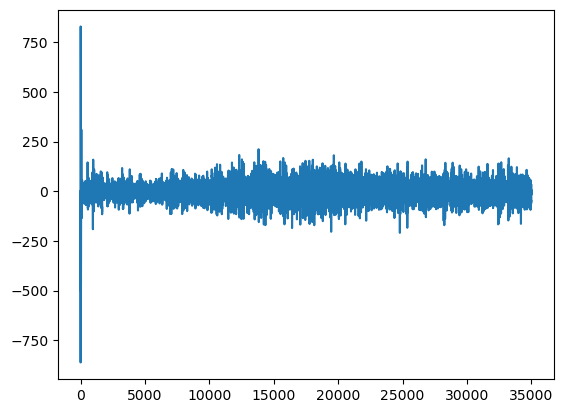

In [162]:
plt.plot(filtered_signal_data[0])

# Cutting first and last 3 mins

In [163]:
Cut_signal_data=[]
fs=20
for i in range(len(signals)):
    cut_signal=filtered_signal_data[i][(3*60*fs):-(3*60*fs)]
    Cut_signal_data.append(cut_signal)
len(Cut_signal_data[0])

27800

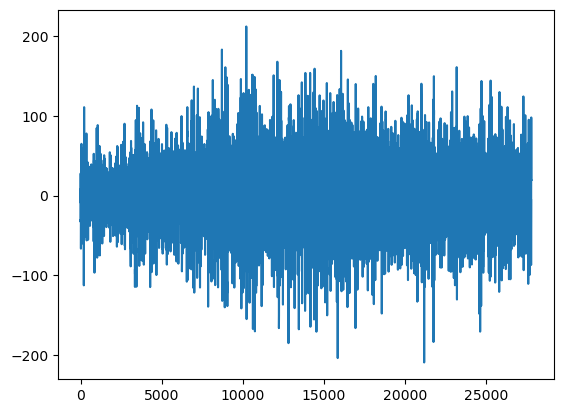

In [164]:
plt.plot(Cut_signal_data[0])

In [165]:
Cut_signal_data


[array([-30.76267869, -32.90425865, -27.56279447, ...,  25.26504373,
         26.37964079,  19.16057291]),
 array([11.39407478, 12.3713968 , 15.09442797, ...,  9.26223995,
        -1.33297223, -6.88584462]),
 array([36.89491546, 40.61688316, 45.29957655, ..., -2.16370404,
         7.24487454, 16.69438067]),
 array([-25.16637053, -30.12251949, -37.6111002 , ..., -47.39297885,
        -51.89782711, -60.73414751]),
 array([ 162.98559259,  152.71801274,  136.44500555, ..., -201.65998306,
        -184.98870133, -154.37261882]),
 array([-15.17613076, -20.16996715, -22.72155429, ..., -11.50943914,
        -13.21766415, -14.32194601]),
 array([-26.36552139, -31.23341218, -32.34868971, ...,   5.00825363,
          8.01562007,   4.55849969]),
 array([-27.55593163, -23.92013111, -18.10369474, ...,  43.79613546,
         34.50143314,  23.3861943 ]),
 array([-45.22314259, -38.70887539, -47.82517356, ...,   0.68089427,
         -1.15937393,   1.19185807]),
 array([-32.18849837, -24.31327774, -27.285

# Feature Extraction:

In [166]:
import numpy as np
from scipy.stats import entropy
from PyEMD import EMD

# Assuming 'signal' is your EHG signal

# Fractal Dimension (using Higuchi's method)
def fractal_dimension(signal):
    n = len(signal)
    k_max = 10  # Maximum scale
    Lmk = np.zeros(k_max)

    for k in range(1, k_max + 1):
        Lm = 0
        for m in range(1, k + 1):
            # Calculate the length of the curve
            Lmk_sum = np.sum(np.abs(np.diff(signal[::m])))
            Lm += Lmk_sum * (n - 1) / ((n - 1) / m)
        Lm /= k
        Lmk[k - 1] = np.log(Lm)

    fit = np.polyfit(np.log(np.arange(1, k_max + 1)), Lmk, 1)
    return fit[0]


In [167]:
from scipy.sparse import lil_matrix

def fuzzy_entropy(signal, m=2, r=0.2):
    # Ensure the signal is a NumPy array
    signal = np.array(signal)

    # Number of data points in the signal
    N = len(signal)

    # Initialize sparse matrices for similarity counting
    similarity_matrix_1 = lil_matrix((N - m + 1, N - m + 1), dtype=bool)
    similarity_matrix_2 = lil_matrix((N - m, N - m), dtype=bool)

    # Populate the sparse matrices
    for i in range(N - m + 1):
        for j in range(i, N - m + 1):
            dist = np.linalg.norm(signal[i:i+m] - signal[j:j+m])
            similarity_matrix_1[i, j] = (dist <= r)
            similarity_matrix_1[j, i] = similarity_matrix_1[i, j]

    for i in range(N - m):
        for j in range(i, N - m):
            dist = np.linalg.norm(signal[i:i+m+1] - signal[j:j+m+1])
            similarity_matrix_2[i, j] = (dist <= r)
            similarity_matrix_2[j, i] = similarity_matrix_2[i, j]

    # Calculate fuzzy entropy
    phi_m_r_1 = similarity_matrix_1.sum() / ((N - m + 1) * (N - m))
    phi_m_r_2 = similarity_matrix_2.sum() / ((N - m) * (N - m - 1))

    fuzzy_entropy = -np.log(phi_m_r_1 / phi_m_r_2)

    return fuzzy_entropy

In [168]:
def interquartile_range(signal):
    return np.percentile(signal, 75) - np.percentile(signal, 25)

# Mean Absolute Deviation
def mean_absolute_deviation(signal):
    return np.mean(np.abs(signal - np.mean(signal)))

# Mean Energy
def mean_energy(signal):
    return np.mean(np.square(signal))

# Mean Teager-Kaiser Energy
def mean_teager_kaiser_energy(signal):
    return np.mean(np.square(signal[1:-1]) - signal[:-2] * signal[2:])


# Standard Deviation
def standard_deviation(signal):
    return np.std(signal)


In [169]:
def sample_entropy(signal, m=2, r=0.2):
    # Ensure the signal is a NumPy array
    signal = np.array(signal)

    # Number of data points in the signal
    N = len(signal)

    # Function to calculate the maximum distance between vectors of length m
    def max_distance(subseq1, subseq2):
        return max(np.abs(subseq1[i] - subseq2[i]) for i in range(m))

    # Count similar patterns for the original signal
    similar_patterns_orig = 0
    for i in range(N - m):
        for j in range(i + 1, N - m):
            dist = max_distance(signal[i:i+m], signal[j:j+m])
            if dist <= r:
                similar_patterns_orig += 1

    # Count similar patterns for the signal with an additional point
    similar_patterns_new = 0
    for i in range(N - m - 1):
        for j in range(i + 1, N - m - 1):
            dist = max_distance(signal[i:i+m+1], signal[j:j+m+1])
            if dist <= r:
                similar_patterns_new += 1

    # Calculate sample entropy
    sample_entropy = -np.log((similar_patterns_orig + 1e-10) / (similar_patterns_new + 1e-10))

    return sample_entropy


In [170]:

import numpy as np

def box_count(data, epsilon):
    data_min = np.min(data)
    data_max = np.max(data)
    num_boxes = int((data_max - data_min) / epsilon)
    count = 0
    for i in range(num_boxes):
        box_start = data_min + i * epsilon
        box_end = box_start + epsilon
        box_data = data[(data >= box_start) & (data < box_end)]
        if len(box_data) > 0:
            count += 1
    return count

def fractal_dimension(data, epsilon_min=0.9, epsilon_max=5, num_epsilon=10):
    epsilon_values = np.linspace(epsilon_min, epsilon_max, num_epsilon)
    counts = []

    for epsilon in epsilon_values:
        count = box_count(data, epsilon)
        counts.append(count)

    # Filter out zero counts
    epsilon_values = epsilon_values[np.array(counts) > 0]
    counts = np.array(counts)[np.array(counts) > 0]

    if len(epsilon_values) == 0 or len(counts) == 0:
        return None

    # Fit a linear regression to estimate the fractal dimension
    coeffs = np.polyfit(np.log(epsilon_values), np.log(counts), 1)
    fractal_dim = -coeffs[0]

    return fractal_dim

# # Example usage:
# if __name__ == "__main__":
#     data = np.random.rand(1000)
#     epsilon_min = 0.01
#     epsilon_max = 0.5
#     num_epsilon = 20
#     fractal_dim = fractal_dimension(data, epsilon_min, epsilon_max, num_epsilon)
#     print("Fractal dimension:", fractal_dim)


In [171]:
# import numpy as np
# from scipy.stats import entropy
# from PyEMD import EMD
# import pywt

# # Define functions for feature calculation
# def fractal_dimension(signal):
#     # Implement fractal dimension calculation
#     pass

# def fuzzy_entropy(signal):
#     # Implement fuzzy entropy calculation
#     pass

# def interquartile_range(signal):
#     return np.percentile(signal, 75) - np.percentile(signal, 25)

# def mean_absolute_deviation(signal):
#     return np.mean(np.abs(signal - np.mean(signal)))

# def mean_energy(signal):
#     return np.mean(np.square(signal))

# def mean_teager_kaiser_energy(signal):
#     return np.mean(np.square(np.diff(signal)))

# def sample_entropy(signal):
#     # Implement sample entropy calculation
#     pass

# def standard_deviation(signal):
#     return np.std(signal)

# # Define a function to perform Wavelet Packet Decomposition (WPD)
# def perform_wpd(signal, level):
#     # Choose a wavelet (e.g., 'db1' for Daubechies wavelet)
#     wavelet = 'db8'

#     # Perform WPD using pywt.wavedec
#     coeffs = pywt.wavedec(signal, wavelet, level=level)

#     # Select a subset of coefficients for further processing
#     selected_coeffs = coeffs[1:]  # Exclude the approximation coefficients at level 0

#     return selected_coeffs

# Signal_feature_data=[]

# for i in range(len(signals)):
#     # Assuming 'signal' is the EHG signal
#     signal = Cut_signal_data[i]  # Example signal
#     levels = 5   # Example number of decomposition levels

#     # Initialize lists to store features
#     features = []

#     # Initialize EMD for IMF extraction
#     emd = EMD()

#     # Perform EMD on the signal
#     imfs = emd(signal)

#     # Perform WPD on each IMF and extract features
#     for imf in imfs:
#         # Perform WPD and select coefficients
#         wpd_coeffs = []  # Store selected WPD coefficients here
#         for level in range(levels):
#             selected_coeffs = perform_wpd(imf, level)
#             wpd_coeffs.extend(selected_coeffs)

#         # Calculate features for each coefficient
#         for coeff in wpd_coeffs:
#             features.append([
#                 fractal_dimension(coeff),   #                # Fractal Dimension
#                 fuzzy_entropy(coeff),     #                 # Fuzzy Entropy
#                 interquartile_range(coeff),                # Interquartile Range
#                 mean_absolute_deviation(coeff),            # Mean Absolute Deviation
#                 mean_energy(coeff),                        # Mean Energy
#                 mean_teager_kaiser_energy(coeff),          # Mean Teager-Kaiser Energy
#                 sample_entropy(coeff),  #                   # Sample Entropy
#                 standard_deviation(coeff),                 # Standard Deviation
#             ])
#     Signal_feature_data.append(features)

# # 'features' now contains the extracted features from EMD and WPD


In [172]:


# def fuzzy_entropy(data, m=2, r=0.15):
#     """
#     Compute the fuzzy entropy of a 1D array of data.

#     Parameters:
#     - data: 1D array, input data
#     - m: int, embedding dimension (length of sequences to compare)
#     - r: float, tolerance range

#     Returns:
#     - fuzzy_entropy: float, fuzzy entropy value
#     """
#     N = len(data)

#     # Create embedding matrix
#     embedded_data = np.array([data[i:i+m] for i in range(N-m+1)])

#     # Calculate distance matrix
#     distance_matrix = np.zeros((len(embedded_data), len(embedded_data)))
#     for i in range(len(embedded_data)):
#         for j in range(len(embedded_data)):
#             distance_matrix[i, j] = max(np.abs(embedded_data[i] - embedded_data[j]))

#     # Calculate similarity matrix
#     similarity_matrix = np.zeros_like(distance_matrix)
#     for i in range(len(distance_matrix)):
#         for j in range(len(distance_matrix)):
#             if distance_matrix[i, j] <= r:
#                 similarity_matrix[i, j] = 1

#     # Compute probabilities
#     p_i = np.sum(similarity_matrix, axis=1) / (N - m + 1)

#     # Remove zeros to prevent NaN in the calculation
#     p_i = p_i[p_i > 0]

#     # Calculate fuzzy entropy
#     fuzzy_entropy = -np.log(np.mean(p_i))

#     return fuzzy_entropy

# def sample_entropy(data, m=3, r=0.05):
#     """
#     Compute the sample entropy of a 1D array of data.

#     Parameters:
#     - data: 1D array, input data
#     - m: int, embedding dimension (length of sequences to compare)
#     - r: float, tolerance range

#     Returns:
#     - sample_entropy: float, sample entropy value
#     """
#     N = len(data)

#     # Create embedding matrix
#     embedded_data = np.array([data[i:i+m] for i in range(N-m+1)])

#     # Calculate distance matrix
#     distance_matrix = np.zeros((len(embedded_data), len(embedded_data)))
#     for i in range(len(embedded_data)):
#         for j in range(len(embedded_data)):
#             distance_matrix[i, j] = max(np.abs(embedded_data[i] - embedded_data[j]))

#     # Count similar sequences
#     similar_sequences = np.sum(distance_matrix <= r, axis=1) - 1  # Subtract 1 to exclude self-matches

#     # Compute sample entropy
#     sample_entropy = -np.log(np.mean(similar_sequences) / (N - m + 1))

#     return sample_entropy



In [173]:
from pyentrp import entropy as ent
def sample_entropy(signal):
    std_ts = np.std(signal)
    sample_entropy = ent.sample_entropy(signal, 4, 0.2 * std_ts)
    return sample_entropy
def fuzzy_entropy(signal):
    fuzzy_entropy_value = ent.shannon_entropy(signal)
    return fuzzy_entropy_value


In [174]:
import numpy as np
from scipy.stats import entropy
import pywt

# Define functions for feature calculation
# def fractal_dimension(signal):
#     # Implement fractal dimension calculation
#     pass

# def fuzzy_entropy(signal):
#     # Implement fuzzy entropy calculation
#     pass

def interquartile_range(signal):
    return np.percentile(signal, 75) - np.percentile(signal, 25)

def mean_absolute_deviation(signal):
    return np.mean(np.abs(signal - np.mean(signal)))

def mean_energy(signal):
    return np.mean(np.square(signal))

def mean_teager_kaiser_energy(signal):
    return np.mean(np.square(np.diff(signal)))

# def sample_entropy(signal):
#     # Implement sample entropy calculation
#     pass

def standard_deviation(signal):
    return np.std(signal)

# Define a function to perform Discrete Wavelet Transform (DWT)
def perform_dwt(signal, wavelet, level):
    # Perform DWT using pywt.wavedec
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    return coeffs
def perform_wpd(signal, level):
    # Choose a wavelet (e.g., 'db1' for Daubechies wavelet)
    wavelet = 'db8'

    # Perform WPD using pywt.wavedec
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Select a subset of coefficients for further processing
    selected_coeffs = coeffs[1:]  # Exclude the approximation coefficients at level 0

    return selected_coeffs


Signal_feature_data = []

# Define the wavelet to be used for DWT
wavelet = 'db4'  # Example wavelet, you can choose according to your requirements
levels = 5        # Example number of decomposition levels

for i in range(len(signals)):
    # Assuming 'signal' is the EHG signal
    signal = Cut_signal_data[i]  # Example signal

    # Initialize lists to store features
    features = []

    # Perform DWT on the signal
    coeffs = perform_dwt(signal, wavelet, level=levels)

    # Perform WPD on each IMF and extract features
    for imf in coeffs:
        # Perform WPD and select coefficients
        wpd_coeffs = []  # Store selected WPD coefficients here
        for level in range(levels):
            selected_coeffs = perform_wpd(imf, level)
            wpd_coeffs.extend(selected_coeffs)

        # Calculate features for each coefficient
        for coeff in wpd_coeffs:
            features.append([
                fractal_dimension(coeff),   #                # Fractal Dimension
                fuzzy_entropy(coeff),     #                 # Fuzzy Entropy
                interquartile_range(coeff),                # Interquartile Range
                mean_absolute_deviation(coeff),            # Mean Absolute Deviation
                mean_energy(coeff),                        # Mean Energy
                mean_teager_kaiser_energy(coeff),          # Mean Teager-Kaiser Energy
                sample_entropy(coeff),  #                   # Sample Entropy
                standard_deviation(coeff),                 # Standard Deviation
            ])
    Signal_feature_data.append(features)

# 'features' now contains the extracted features from DWT


In [175]:
len(Signal_feature_data)

64

In [179]:
# for i in range(64):
#     print(f"Signal no: {i}--->{Signal_feature_data[i]}")
#     print()

In [183]:
dset = []
for i in Signal_feature_data:
    temp_df = pd.DataFrame(i)
    
    # Compute the mean for each row (along axis 1)
    col_means = temp_df.mean(axis=0)
    
    # Append the row means to the dataset
    dset.append(col_means)

# Convert the dataset to a DataFrame
dset_df = pd.DataFrame(dset)

In [188]:
dset_df.head(10)

,0,1,2,3,4,5,7
0,0.729785,9.481513,78.096979,47.917477,8536.806538,12045.004074,62.165351
1,0.772712,9.481513,39.079069,29.226391,4598.073411,6801.270433,42.928722
2,0.692439,9.481513,76.970032,56.515543,17467.905148,23601.993429,82.026670
3,0.580331,9.481513,100.174934,75.261307,26650.225084,38662.925824,114.752481
4,0.723652,9.481513,38.036466,33.701496,9519.245430,20018.988340,62.470037
5,0.731981,9.481513,54.513911,37.214001,5608.800175,9584.216913,51.423406
6,0.750954,9.481513,44.617979,26.816248,2936.862019,2953.956823,35.104649
7,0.628107,9.481513,63.808282,46.237852,11816.186674,15221.848046,66.314275
8,0.546455,9.481513,72.466016,74.665010,28373.697890,56761.676378,131.224937
9,0.690093,9.481513,71.952819,46.949027,10196.613540,9496.492837,63.304323


In [402]:
dset_df['Term']=0

In [190]:
dset_df.head()

,0,1,2,3,4,5,7,Term
0,0.729785,9.481513,78.096979,47.917477,8536.806538,12045.004074,62.165351,1
1,0.772712,9.481513,39.079069,29.226391,4598.073411,6801.270433,42.928722,1
2,0.692439,9.481513,76.970032,56.515543,17467.905148,23601.993429,82.026670,1
3,0.580331,9.481513,100.174934,75.261307,26650.225084,38662.925824,114.752481,1
4,0.723652,9.481513,38.036466,33.701496,9519.245430,20018.988340,62.470037,1


In [177]:
df=pd.DataFrame(Signal_feature_data[0])
df.shape

(60, 8)

In [330]:
dset= []
for i in Signal_feature_data:
    temp_df = pd.DataFrame(i).describe()
    
    # Compute the mean for each row (along axis 1)
    col_means = temp_df.mean(axis=0)
    #col_means2=temp_df.
    # Append the row means to the dataset
    dset.append(np.concatenate((temp_df[0].values,temp_df[1].values,temp_df[2].values,temp_df[3].values,temp_df[4].values,temp_df[5].values,temp_df[7].values),axis=0))
#     dset2.append(temp_df[0].values)
#     dset2.append(temp_df[1].values)
#     dset2.append(temp_df[2].values)
#     dset2.append(temp_df[3].values)
#     dset2.append(temp_df[4].values)
#     dset2.append(temp_df[5].values)
#     #dset2.append(temp_df[6].values)
#     dset2.append(temp_df[7].values)
    

# Convert the dataset to a DataFrame
dset_df = pd.DataFrame(dset)

In [178]:
Feature_arr=np.array(Signal_feature_data)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (64, 60, 8) + inhomogeneous part.

In [331]:
dset_df.shape

(62, 56)

In [ ]:
np.size(Feature_arr[0][0])

In [ ]:
Feature_arr.shape

In [ ]:
Feature_arr[0][0]

In [ ]:

np.size(Feature_arr[0]) 


A signal is decomposed into 6x8 signal. 8 Features of each signal is collected

We need to make a dataFrame for which each row will represent a signal


In [ ]:
Feature_arr_reshape=Feature_arr.reshape(64,-1)


In [ ]:
Feature_np=np.array(Feature_arr)
mean_array=[]
for i in Feature_arr:
    mean=np.mean(i,axis=1)
    mean_array.append(mean)
mean_array.shape

In [ ]:
Feature_arr[0][0]

In [ ]:
Feature_np.shape

In [ ]:
Feature_arr_reshape.shape

In [ ]:
# Final_dataset_term=[]
# for i in range(len(Feature_arr_reshape)):
#     arr=[]
#     for j in range(len(Feature_arr_reshape[i])):
#         for k in range(len(Feature_arr_reshape[i][j])):
#             for l in range(len(Feature_arr_reshape[i][j][k])):
#                 arr.append(Feature_arr_reshape[i][j][k][l])
#     Final_dataset_term.append(arr)

In [ ]:
Final_dataset_term=Feature_arr_reshape

In [ ]:
len(Final_dataset_term[0])

In [ ]:
df=pd.DataFrame(Final_dataset_term)
df.shape

In [ ]:
df1=df.copy()
df2=df.copy()

In [ ]:
df.dropna(axis=1,inplace=True)
df.head()

In [ ]:
df["Term"]=1

In [ ]:
df.head()

In [ ]:
df.shape

# Pre-term:

In [191]:
import os
import glob
import scipy.io

folder_path = "Final_dataset_preterm"

file_paths = glob.glob(os.path.join(folder_path, "*.mat"))

signals=[]
for file_path in file_paths:
    data= scipy.io.loadmat(file_path)
    signals.append(data)
#     print(data)  # Example: Print the loaded data


In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Function to create a bandpass Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply the bandpass filter to a signal
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Example usage
fs = 20  # Sampling frequency
t = np.linspace(0, 5, 5 * fs, endpoint=False)  # Time vector
# Define the bandpass filter parameters
lowcut = 0.3  # Lower cutoff frequency in Hz
highcut = 3.0  # Upper cutoff frequency in Hz
order = 4  # Filter order


filtered_signal_data=[]
for i in range(len(signals)):
    
    filtered_signal = butter_bandpass_filter(Signal_data_arr[i], lowcut, highcut, fs, order)
    filtered_signal_data.append(filtered_signal)
# Plot the original and filtered signals
# plt.figure(figsize=(10, 6))
# plt.plot( signal, label='Original Signal')
# plt.plot( filtered_signal, label='Filtered Signal')
# plt.title('Bandpass Filter Applied to Signal')
# plt.xlabel('Time (seconds)')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.show()


In [ ]:
plt.plot(filtered_signal_data[0])

# Cut Signal Data:

In [193]:
Cut_signal_data=[]
fs=20

for i in range(len(signals)):
    cut_signal=filtered_signal_data[i][(3*60*fs):-(3*60*fs)]
    Cut_signal_data.append(cut_signal)
#len(Cut_signal_data[0])

# Feature Extraction:

In [ ]:
# import numpy as np
# from scipy.stats import entropy
# from PyEMD import EMD
# import pywt

# # Define functions for feature calculation
# def fractal_dimension(signal):
#     # Implement fractal dimension calculation
#     pass

# def fuzzy_entropy(signal):
#     # Implement fuzzy entropy calculation
#     pass

# def interquartile_range(signal):
#     return np.percentile(signal, 75) - np.percentile(signal, 25)

# def mean_absolute_deviation(signal):
#     return np.mean(np.abs(signal - np.mean(signal)))

# def mean_energy(signal):
#     return np.mean(np.square(signal))

# def mean_teager_kaiser_energy(signal):
#     return np.mean(np.square(np.diff(signal)))

# def sample_entropy(signal):
#     # Implement sample entropy calculation
#     pass

# def standard_deviation(signal):
#     return np.std(signal)

# # Define a function to perform Wavelet Packet Decomposition (WPD)
# def perform_wpd(signal, level):
#     # Choose a wavelet (e.g., 'db1' for Daubechies wavelet)
#     wavelet = 'db8'

#     # Perform WPD using pywt.wavedec
#     coeffs = pywt.wavedec(signal, wavelet, level=level)

#     # Select a subset of coefficients for further processing
#     selected_coeffs = coeffs[1:]  # Exclude the approximation coefficients at level 0

#     return selected_coeffs

# Signal_feature_data=[]

# for i in range(len(signals)):
#     # Assuming 'signal' is the EHG signal
#     signal = Cut_signal_data[i]  # Example signal
#     levels = 5   # Example number of decomposition levels

#     # Initialize lists to store features
#     features = []

#     # Initialize EMD for IMF extraction
#     emd = EMD()

#     # Perform EMD on the signal
#     imfs = emd(signal)

#     # Perform WPD on each IMF and extract features
#     for imf in imfs:
#         # Perform WPD and select coefficients
#         wpd_coeffs = []  # Store selected WPD coefficients here
#         for level in range(levels):
#             selected_coeffs = perform_wpd(imf, level)
#             wpd_coeffs.extend(selected_coeffs)

#         # Calculate features for each coefficient
#         for coeff in wpd_coeffs:
#             features.append([
#                 fractal_dimension(coeff),   #                # Fractal Dimension
#                 fuzzy_entropy(coeff),     #                 # Fuzzy Entropy
#                 interquartile_range(coeff),                # Interquartile Range
#                 mean_absolute_deviation(coeff),            # Mean Absolute Deviation
#                 mean_energy(coeff),                        # Mean Energy
#                 mean_teager_kaiser_energy(coeff),          # Mean Teager-Kaiser Energy
#                 sample_entropy(coeff),  #                   # Sample Entropy
#                 standard_deviation(coeff),                 # Standard Deviation
#             ])
#     Signal_feature_data.append(features)

# # 'features' now contains the extracted features from EMD and WPD


In [194]:
# import numpy as np
# from scipy.stats import entropy
# import pywt

# Define functions for feature calculation
# def fractal_dimension(signal):
#     # Implement fractal dimension calculation
#     pass

# def fuzzy_entropy(signal):
#     # Implement fuzzy entropy calculation
#     pass

def interquartile_range(signal):
    return np.percentile(signal, 75) - np.percentile(signal, 25)

def mean_absolute_deviation(signal):
    return np.mean(np.abs(signal - np.mean(signal)))

def mean_energy(signal):
    return np.mean(np.square(signal))

def mean_teager_kaiser_energy(signal):
    return np.mean(np.square(np.diff(signal)))

# def sample_entropy(signal):
#     # Implement sample entropy calculation
#     pass

def standard_deviation(signal):
    return np.std(signal)

# Define a function to perform Discrete Wavelet Transform (DWT)
def perform_dwt(signal, wavelet, level):
    # Perform DWT using pywt.wavedec
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    return coeffs
def perform_wpd(signal, level):
    # Choose a wavelet (e.g., 'db1' for Daubechies wavelet)
    wavelet = 'db8'

    # Perform WPD using pywt.wavedec
    coeffs = pywt.wavedec(signal, wavelet, level=level)

    # Select a subset of coefficients for further processing
    selected_coeffs = coeffs[1:]  # Exclude the approximation coefficients at level 0

    return selected_coeffs


Signal_feature_data = []

# Define the wavelet to be used for DWT
wavelet = 'db4'  # Example wavelet, you can choose according to your requirements
levels = 5        # Example number of decomposition levels

for i in range(len(signals)):
    # Assuming 'signal' is the EHG signal
    signal = Cut_signal_data[i]  # Example signal

    # Initialize lists to store features
    features = []

    # Perform DWT on the signal
    coeffs = perform_dwt(signal, wavelet, level=levels)

    # Perform WPD on each IMF and extract features
    for imf in coeffs:
        # Perform WPD and select coefficients
        wpd_coeffs = []  # Store selected WPD coefficients here
        for level in range(levels):
            selected_coeffs = perform_wpd(imf, level)
            wpd_coeffs.extend(selected_coeffs)

        # Calculate features for each coefficient
        for coeff in wpd_coeffs:
            features.append([
                fractal_dimension(coeff),   #                # Fractal Dimension
                fuzzy_entropy(coeff),     #                 # Fuzzy Entropy
                interquartile_range(coeff),                # Interquartile Range
                mean_absolute_deviation(coeff),            # Mean Absolute Deviation
                mean_energy(coeff),                        # Mean Energy
                mean_teager_kaiser_energy(coeff),          # Mean Teager-Kaiser Energy
                sample_entropy(coeff),  #                   # Sample Entropy
                standard_deviation(coeff),                 # Standard Deviation
            ])
    Signal_feature_data.append(features)

# 'features' now contains the extracted features from DWT


In [195]:
len(Signal_feature_data)

62

In [318]:
dset2 = []
for i in Signal_feature_data:
    temp_df = pd.DataFrame(i).describe()
    
    # Compute the mean for each row (along axis 1)
    col_means = temp_df.mean(axis=0)
    #col_means2=temp_df.
    # Append the row means to the dataset
    dset2.append(np.concatenate((temp_df[0].values,temp_df[1].values,temp_df[2].values,temp_df[3].values,temp_df[4].values,temp_df[5].values,temp_df[7].values),axis=0))
#     dset2.append(temp_df[0].values)
#     dset2.append(temp_df[1].values)
#     dset2.append(temp_df[2].values)
#     dset2.append(temp_df[3].values)
#     dset2.append(temp_df[4].values)
#     dset2.append(temp_df[5].values)
#     #dset2.append(temp_df[6].values)
#     dset2.append(temp_df[7].values)
    

# Convert the dataset to a DataFrame
dset_df2 = pd.DataFrame(dset2)

In [326]:
dset_df2.shape

(62, 57)

In [327]:
dset_df.shape

(0, 1)

In [316]:
# dset2 = []

# for i in Signal_feature_data:
#     temp_df = pd.DataFrame(i).describe()
#     dset2.append(temp_df)

# # Concatenate the DataFrames along axis 0
# dset_df2 = pd.concat(dset2, axis=0)

# # Reset the index of the concatenated DataFrame
# dset_df2.reset_index(drop=True, inplace=True)


In [319]:
dset_df2.shape

(62, 56)

In [312]:
# pd.DataFrame(Signal_feature_data[0]).describe()[0].values

array([60.        ,  0.72978464,  0.25159506,  0.14185196,  0.49033848,
        0.73303956,  1.00646996,  1.10112021])

In [313]:
dset_df2.head(10)

,0,1,2,3,4,5,6,7
0,60.0,0.729785,0.251595,0.141852,0.490338,0.733040,1.006470,1.101120
1,60.0,9.481513,1.754498,6.087463,7.851749,9.293537,10.773139,12.764664
2,60.0,78.096979,92.058088,0.066630,5.029167,33.034071,105.718220,276.195777
3,60.0,47.917477,54.642766,0.047100,3.809860,21.627000,66.310536,165.613897
4,60.0,8536.806538,14600.735929,0.008388,24.478005,883.669263,7572.316070,45299.574044
5,60.0,12045.004074,18620.982523,0.019519,27.607451,1211.699423,13846.962442,64851.685406
6,60.0,62.165351,68.865012,0.091500,4.947245,29.670784,87.019031,212.763143
7,59.0,0.772712,0.264414,0.179168,0.565309,0.748322,0.978506,1.178847
8,60.0,9.481513,1.754498,6.087463,7.851749,9.293537,10.773139,12.764664
9,60.0,39.079069,45.900519,0.041327,3.265142,19.522244,44.271227,141.937698


In [314]:
dset_df2.shape

(434, 8)

In [289]:
dset_df2.describe().columns

Int64Index([0, 1, 2, 3, 4, 5, 7], dtype='int64')

In [302]:
samp

,count,mean,std,min,25%,50%,75%,max
0,62.0,0.679984,7.553205e-02,0.421936,0.627203,0.676702,0.731177,0.827368
1,62.0,9.481513,1.253601e-14,9.481513,9.481513,9.481513,9.481513,9.481513
2,62.0,69.130323,5.048634e+01,19.488609,42.840208,56.485216,74.366353,334.722389
3,62.0,48.372576,3.201086e+01,13.436284,31.267257,38.117888,54.254041,196.219337
4,62.0,20703.436246,5.133859e+04,611.599040,4670.499886,7398.741452,14407.584910,376042.485593
5,62.0,35562.013651,1.135482e+05,975.607546,6545.850842,10147.654388,19809.750673,879416.895465
7,62.0,73.704199,6.163405e+01,18.223442,43.852171,59.194268,79.392597,432.494167
Term,62.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


In [403]:
dset_df2['Term']=1

In [321]:
dset_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,Term
0,60.0,0.729785,0.251595,0.141852,0.490338,0.733040,1.006470,1.101120,60.0,9.481513,...,64851.685406,60.0,62.165351,68.865012,0.091500,4.947245,29.670784,87.019031,212.763143,0
1,59.0,0.772712,0.264414,0.179168,0.565309,0.748322,0.978506,1.178847,60.0,9.481513,...,48588.686109,60.0,42.928722,52.876856,0.040291,2.230166,20.884826,62.042778,174.441612,0
2,60.0,0.692439,0.309374,-0.000000,0.406204,0.631146,0.910198,1.313192,60.0,9.481513,...,134167.647672,60.0,82.026670,104.242343,0.067227,3.224522,31.644095,127.486406,315.896958,0
3,60.0,0.580331,0.244476,-0.000000,0.397646,0.588012,0.707992,1.178847,60.0,9.481513,...,229867.892748,60.0,114.752481,116.885556,0.095087,9.915898,63.630894,203.468326,387.629797,0
4,60.0,0.723652,0.254094,0.175603,0.563407,0.697652,0.879536,1.129475,60.0,9.481513,...,537283.540594,60.0,62.470037,75.464139,0.100596,3.307992,27.494779,95.888434,407.451736,0


In [404]:
Final_dset2=pd.concat([dset_df,dset_df2],axis=0)
Final_dset2.head(10)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,Term
0,60.0,0.729785,0.251595,0.141852,0.490338,0.733040,1.006470,1.101120,60.0,9.481513,...,64851.685406,60.0,62.165351,68.865012,0.091500,4.947245,29.670784,87.019031,212.763143,0
1,59.0,0.772712,0.264414,0.179168,0.565309,0.748322,0.978506,1.178847,60.0,9.481513,...,48588.686109,60.0,42.928722,52.876856,0.040291,2.230166,20.884826,62.042778,174.441612,0
2,60.0,0.692439,0.309374,-0.000000,0.406204,0.631146,0.910198,1.313192,60.0,9.481513,...,134167.647672,60.0,82.026670,104.242343,0.067227,3.224522,31.644095,127.486406,315.896958,0
3,60.0,0.580331,0.244476,-0.000000,0.397646,0.588012,0.707992,1.178847,60.0,9.481513,...,229867.892748,60.0,114.752481,116.885556,0.095087,9.915898,63.630894,203.468326,387.629797,0
4,60.0,0.723652,0.254094,0.175603,0.563407,0.697652,0.879536,1.129475,60.0,9.481513,...,537283.540594,60.0,62.470037,75.464139,0.100596,3.307992,27.494779,95.888434,407.451736,0
5,60.0,0.731981,0.261388,-0.000000,0.593773,0.707251,0.863498,1.262589,60.0,9.481513,...,51274.714652,60.0,51.423406,54.580176,0.058589,3.660499,21.403313,99.164461,162.316116,0
6,60.0,0.750954,0.238270,-0.000000,0.646382,0.762883,0.856242,1.145153,60.0,9.481513,...,19986.531377,60.0,35.104649,41.419298,0.047436,1.946082,16.803485,55.717691,132.338219,0
7,60.0,0.628107,0.207518,-0.000000,0.430652,0.686000,0.765622,1.104483,60.0,9.481513,...,89801.754313,60.0,66.314275,86.572848,0.058478,3.408336,30.182359,84.063467,263.820801,0
8,60.0,0.546455,0.185376,0.185006,0.437626,0.533080,0.670915,1.104483,60.0,9.481513,...,247254.890769,60.0,131.224937,106.277128,0.222010,20.644694,126.013096,202.597405,328.918323,0
9,60.0,0.690093,0.231103,0.147899,0.444990,0.713059,0.834760,1.101120,60.0,9.481513,...,45955.033963,60.0,63.304323,79.298652,0.083592,4.521541,27.937245,82.218809,256.776707,0


In [343]:
Final_dset2

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,Term
0,60.0,0.729785,0.251595,0.141852,0.490338,0.733040,1.006470,1.101120,60.0,9.481513,...,6.485169e+04,60.0,62.165351,68.865012,0.091500,4.947245,29.670784,87.019031,212.763143,1
1,59.0,0.772712,0.264414,0.179168,0.565309,0.748322,0.978506,1.178847,60.0,9.481513,...,4.858869e+04,60.0,42.928722,52.876856,0.040291,2.230166,20.884826,62.042778,174.441612,1
2,60.0,0.692439,0.309374,-0.000000,0.406204,0.631146,0.910198,1.313192,60.0,9.481513,...,1.341676e+05,60.0,82.026670,104.242343,0.067227,3.224522,31.644095,127.486406,315.896958,1
3,60.0,0.580331,0.244476,-0.000000,0.397646,0.588012,0.707992,1.178847,60.0,9.481513,...,2.298679e+05,60.0,114.752481,116.885556,0.095087,9.915898,63.630894,203.468326,387.629797,1
4,60.0,0.723652,0.254094,0.175603,0.563407,0.697652,0.879536,1.129475,60.0,9.481513,...,5.372835e+05,60.0,62.470037,75.464139,0.100596,3.307992,27.494779,95.888434,407.451736,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,60.0,0.724316,0.302503,-0.000000,0.587141,0.770559,0.909146,1.232634,60.0,9.481513,...,2.371735e+04,60.0,41.924375,48.258825,0.042652,4.311380,25.747221,58.259415,152.600865,0
58,60.0,0.631735,0.201558,-0.000000,0.521091,0.658056,0.728261,1.044487,60.0,9.481513,...,1.012381e+05,60.0,62.937536,72.368025,0.064076,4.662161,35.800242,99.255902,234.207957,0
59,60.0,0.575441,0.323181,0.062549,0.227805,0.563155,0.811434,1.262589,60.0,9.481513,...,1.676240e+06,60.0,244.800304,310.483908,0.188277,17.327203,107.892513,363.429243,1154.076056,0
60,59.0,0.676313,0.257960,0.134952,0.432691,0.664093,0.871721,1.075416,60.0,9.481513,...,9.951696e+04,60.0,80.098136,98.413362,0.062660,4.190207,42.411056,124.126581,311.644505,0


In [344]:
Final_dset2.isnull().any()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
Term    False
dtype: bool

In [405]:
X2=Final_dset2.drop(labels=['Term'],axis=1).values
y2=Final_dset2.filter(items=['Term'],axis=1).values

In [406]:
y2=y2.flatten()

In [407]:
print(type(X2))
print(type(y2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[6.00000000e+01, 7.29784638e-01, 2.51595058e-01, ...,
        2.96707837e+01, 8.70190312e+01, 2.12763143e+02],
       [5.90000000e+01, 7.72711956e-01, 2.64414102e-01, ...,
        2.08848263e+01, 6.20427778e+01, 1.74441612e+02],
       [6.00000000e+01, 6.92439496e-01, 3.09373601e-01, ...,
        3.16440954e+01, 1.27486406e+02, 3.15896958e+02],
       ...,
       [6.00000000e+01, 5.75440518e-01, 3.23181325e-01, ...,
        1.07892513e+02, 3.63429243e+02, 1.15407606e+03],
       [5.90000000e+01, 6.76312726e-01, 2.57960100e-01, ...,
        4.24110561e+01, 1.24126581e+02, 3.11644505e+02],
       [5.90000000e+01, 7.05334194e-01, 2.43445511e-01, ...,
        1.99187719e+01, 7.85854248e+01, 2.02326266e+02]])

In [383]:
y2.shape


(124,)

In [408]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.25)

In [409]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)


(93, 56)
(93,)
(31, 56)
(31,)


In [417]:
model=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=2,n_jobs=-1)
model.fit(X_train2,y_train2)
y_pred2=model.predict(X_test2)<=0.5

In [419]:
model=LinearRegression(n_jobs=-1)
model.fit(X_train2,y_train2)
y_pred2=model.predict(X_test2)<=0.5

-1.6856661338137284

In [415]:
print(y_test2.tolist())
print(y_pred2.tolist())

[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
[True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, False, False, False, True, False, True, True, False, True, False, False, True]


array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [420]:
accuracy_score(y_test2,y_pred2)

0.9032258064516129

In [421]:
Final_dset2.to_excel('Final_dataset_iteration2.xlsx',index=False)
Final_dset2.to_csv('Final_dataset_iteration2.csv',index=False)

In [427]:
print(metrics.classification_report(y_test2, y_pred2)) #Sequence is very important 

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.86      1.00      0.92        18

    accuracy                           0.90        31
   macro avg       0.93      0.88      0.90        31
weighted avg       0.92      0.90      0.90        31



In [428]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


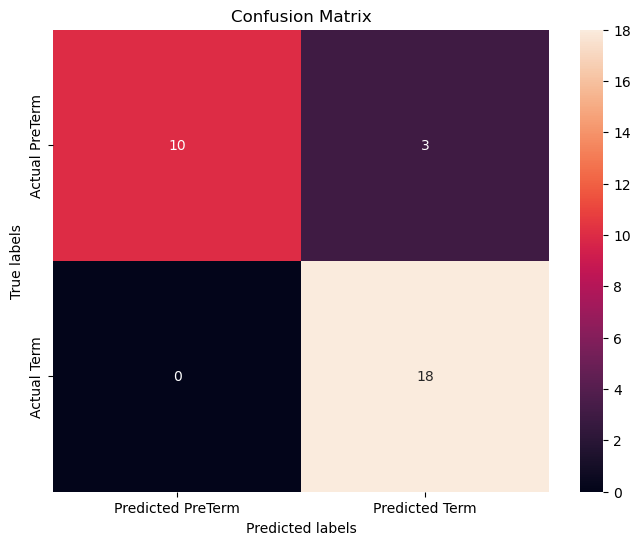

In [434]:
# Create the confusion matrix
cm = confusion_matrix(y_test2, y_pred2)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', 
            xticklabels=['Predicted PreTerm', 'Predicted Term'], 
            yticklabels=['Actual PreTerm', 'Actual Term'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Dataset Forming:

In [ ]:
Feature_arr_preterm=np.array(Signal_feature_data)
Feature_arr_reshape_preterm=Feature_arr_preterm.reshape(62,-1)
Final_dataset_preterm=Feature_arr_reshape_preterm
# for i in range(len(Feature_arr_reshape_preterm)):
#     arr=[]
#     for j in range(len(Feature_arr_reshape_preterm[i])):
#         for k in range(len(Feature_arr_reshape_preterm[i][j])):
#             for l in range(len(Feature_arr_reshape_preterm[i][j][k])):
#                 arr.append(Feature_arr_reshape_preterm[i][j][k][l])
#     Final_dataset_preterm.append(arr)


In [ ]:
Feature_arr_reshape_preterm.shape

In [ ]:
len(Final_dataset_preterm[0])


In [ ]:
df_preterm=pd.DataFrame(Final_dataset_preterm)
df3=df_preterm.copy()
df4=df_preterm.copy()
df_preterm.dropna(axis=1,inplace=True)


In [ ]:
df_preterm.shape

In [ ]:
df_preterm["Term"]=0

In [ ]:
Final_dataset.to_excel('Final_unshaped_dataset.xlsx',index=False)
Final_dataset.to_csv('Final_unshaped_dataset.csv',index=False)

# Final Dataset Forming:

In [ ]:
Final_dataset=pd.concat([df,df_preterm],axis=0)
Final_dataset.head()

In [ ]:
Final_dataset

In [ ]:
Final_dataset.shape

In [ ]:
X=Final_dataset.drop(["Term"],axis=1).values
y=Final_dataset.filter(["Term"],axis=1).values
y=np.array(y)

# Classification:

We will be using both regression and classification Method. For classification, We'll be using 5 fold cross validating gridsearch. 

First we need to see if there is enough variance in the data for unhinged classification or not. For this we're gonna use PCA 

In [ ]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=25,whiten=True)
pca.fit(X)

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
#Sree Plot 
plt.bar(np.arange(1,26),pca.explained_variance_ratio_*100)

#### There is high variance among the data. Hence, it is fit for classification.

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [215]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_params={
    'Linear_regression':{
        'model':LinearRegression(n_jobs=-1),
        'params':{
        'fit_intercept':[True,False],
        'normalize':[True,False]
        
        }
    },
    'SVC':{
        'model':SVC(),
        'params':{
            'kernel':['linear','rbf'],
            'gamma':['auto','scale']
        }
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(n_jobs=-1),
        'params':{
            'n_estimators':[100,200,400],
            'max_depth':[10,20],
            'min_samples_split':[2,4],
            #'max_features':['auto','sqrt']
        }
    },
    'GaussianNB':{
        'model':GaussianNB(),
        'params':{}
    }
}

In [216]:
from sklearn.model_selection import GridSearchCV

In [ ]:
scores=[]
clf=GridSearchCV(model_params['Linear_regression']['model'],model_params['Linear_regression']['params'],cv=5,return_train_score=False)
clf.fit(X,y)
scores.append({
    'model':'Linear_regression',
    'best_score':clf.best_score_,
    'best_params':clf.best_params_
})

In [ ]:
# clf=GridSearchCV(model_params['SVC']['model'],model_params['SVC']['params'],cv=5,return_train_score=False)
# clf.fit(X,y)
# scores.append({
#     'model':'SVC',
#     'best_score':clf.best_score_,
#     'best_params':clf.best_params_
# })

In [ ]:
# clf=GridSearchCV(model_params['RandomForestClassifier']['model'],model_params['RandomForestClassifier']['params'],cv=5,return_train_score=False)
# clf.fit(X,y)
# scores.append({
#     'model':'RandomForestClassifier',
#     'best_score':clf.best_score_,
#     'best_params':clf.best_params_
# })

In [ ]:
# clf=GridSearchCV(model_params['GaussianNB']['model'],model_params['GaussianNB']['params'],cv=5,return_train_score=False)
# clf.fit(X,y)
# scores.append({
#     'model':'GaussianNB',
#     'best_score':clf.best_score_,
#     'best_params':clf.best_params_
# })

In [ ]:
scores

In [217]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35)

In [ ]:
model=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=2,n_jobs=-1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [218]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.4666666666666667


In [ ]:
model2=LinearRegression(fit_intercept=True,normalize=True)
model2.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [422]:
import joblib

In [435]:
joblib.dump(model,"Final_iter2.pkl")

['Final_iter2.pkl']

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GaussianNB()

In [ ]:
!pip install joblib

In [423]:
joblib.dump(model,"Random_Forest_model.pkl")


['Random_Forest_model.pkl']

In [ ]:
scores

In [ ]:
Final_dataset.shape

In [ ]:
Final_dataset.to_excel('Final_unshaped_dataset.xlsx',index=False)
Final_dataset.to_csv('Final_unshaped_dataset.csv',index=False)

In [ ]:
# from flask import Flask, render_template, request
# app = Flask(__name__)
# model = model2

# def preprocess_data(file):
#     if file.filename.endswith('.mat'):
#         data = spio.loadmat(file)
        
#         s1=data['val'][1]
#         s2=data['val'][3]
#         s3=data['val'][5]
#         Signal_data=(s1+s2+s3)/3

#         lowcut=0.3
#         highcut=3
#         order=4
#         fs=20
        
#         smoothed_signal=butter_bandpass_filter(Signal_data, lowcut, highcut, fs, order)
#         cut_signal=smoothed_signal[(3*60*fs):-(3*60*fs)]

#         Signal_feature_data=[]
#         signal = cut_signal
#         levels = 5

#         features = []

#         emd = EMD()

#         imfs = emd(signal)

#         for imf in imfs:
#             wpd_coeffs = [] 
#             for level in range(levels):
#                 selected_coeffs = perform_wpd(imf, level)
#                 wpd_coeffs.extend(selected_coeffs)

#             for coeff in wpd_coeffs:
#                 features.append([
#                     fractal_dimension(coeff),
#                     fuzzy_entropy(coeff),
#                     interquartile_range(coeff),
#                     mean_absolute_deviation(coeff),
#                     mean_energy(coeff),
#                     mean_teager_kaiser_energy(coeff),
#                     sample_entropy(coeff),
#                     standard_deviation(coeff),
#                 ])
#             Signal_feature_data.append(features)
#             processed_data = Signal_feature_data

#         return processed_data


# @app.route('/', methods=['GET', 'POST'])
# def index():
#     if request.method == 'POST':
#         file = request.files['file']
#         if file.filename != '':
#             data = preprocess_data(file)
#             data = np.array(data).reshape((-1, 1))
#             prediction = model.predict(data)
#             if prediction == 1:
#                 result = "Term Delivery"
#             else:
#                 result = "Preterm Delivery"
#             return render_template('result.html', result=result)
#     return render_template('index.html')



# if __name__ == '__main__':
#     app.run(debug=False)

